one robot img1% complete: 67.75367907938174
one robot img2% complete: 83.39246598586986
one robot img3% complete: 90.74136920371456
one robot img4% complete: 56.252121062536645
two robot img1% complete: 80.23015456761175
two robot img2% complete: 79.24598155061241
two robot img3% complete: 85.42251565729799
two robot img4% complete: 74.34979792058742
three robot img1% complete: 91.2103168481782
three robot img2% complete: 95.53882701385247
three robot img3% complete: 91.123931755777
three robot img4% complete: 77.49668342948817


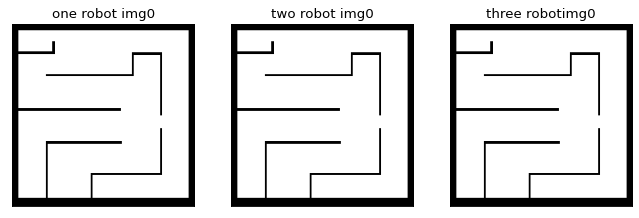

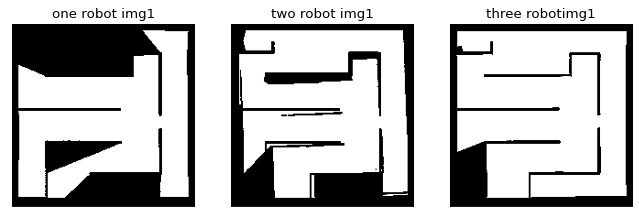

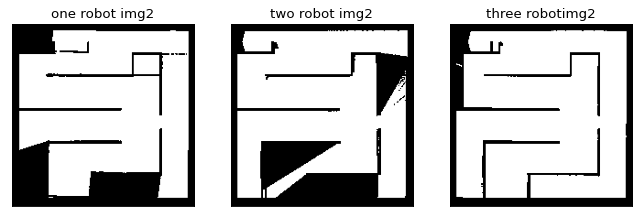

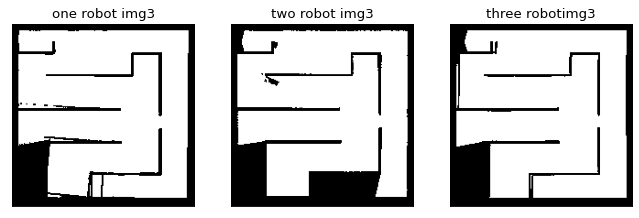

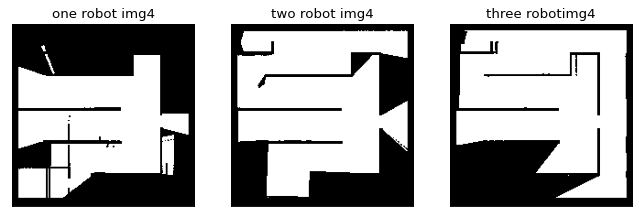

In [ ]:
from matplotlib import pyplot as plt
import cv2
import numpy as nm
import imutils
from skimage.feature import peak_local_max
from skimage.morphology import watershed
from scipy import ndimage 

# import images
img0 = cv2.imread('Office.jpg')
img1 = cv2.imread('resize-one-office-0-1.jpg')
img2 = cv2.imread('resize-one-office-0-3.jpg')
img3 = cv2.imread('resize-one-office-0-5.jpg')
img4 = cv2.imread('resize-one-office-1-0.jpg')
img5 = cv2.imread('resize-two-office-0-1.jpg')
img6 = cv2.imread('resize-two-office-0-3.jpg')
img7 = cv2.imread('resize-two-office-0-5.jpg')
img8 = cv2.imread('resize-two-office-1-0.jpg')
img9 = cv2.imread('resize-three-office-0-1.jpg')
img10 = cv2.imread('resize-three-office-0-3.jpg')
img11 = cv2.imread('resize-three-office-0-5.jpg')
img12 = cv2.imread('resize-three-office-1-0.jpg')

a=[img0,img1,img2,img3,img4]
b=[img0,img5,img6,img7,img8]
c=[img0,img9,img10,img11,img12]

# convert to to Greyscale
for i in range(len(a)):
  a[i]=cv2.cvtColor(a[i],cv2.COLOR_RGB2GRAY)
  b[i]=cv2.cvtColor(b[i],cv2.COLOR_RGB2GRAY)
  c[i]=cv2.cvtColor(c[i],cv2.COLOR_RGB2GRAY)

# threshold to binary
for i in range(len(a)):
  (thresh, a[i])=cv2.threshold(a[i],250, 255, cv2.THRESH_BINARY)
  (thresh, b[i])=cv2.threshold(b[i],250, 255, cv2.THRESH_BINARY)  
  (thresh, c[i])=cv2.threshold(c[i],250, 255, cv2.THRESH_BINARY)    

# bitwise and the sample map with the output maps
a2=a.copy()
b2=b.copy()
c2=c.copy()
for i in range(len(a)):
  a2[i]=cv2.bitwise_and(a2[0],a2[i])
  b2[i]=cv2.bitwise_and(b2[0],b2[i]) 
  c2[i]=cv2.bitwise_and(c2[0],c2[i]) 

# plot
for i in range(len(a)):
  fig = plt.figure(figsize=(10, 10), dpi=80)
  ax = fig.add_subplot(131, aspect='auto')
  ax.imshow(a2[i], cmap='gray')
  ax.set_title('one robot img'+str(i))
  plt.xticks([])
  plt.yticks([])
  ax = fig.add_subplot(132, aspect='auto')
  ax.imshow(b2[i], cmap='gray')
  ax.set_title('two robot img'+str(i))
  plt.xticks([])
  plt.yticks([])
  ax = fig.add_subplot(133, aspect='auto')
  ax.imshow(c2[i], cmap='gray')
  ax.set_title('three robotimg'+str(i))
  plt.xticks([])
  plt.yticks([])

#Count floorspace pixels
a3=a2.copy()
b3=b2.copy()
c3=c2.copy()
for i in range(len(c)):
  a3[i]=cv2.countNonZero(a3[i])
  b3[i]=cv2.countNonZero(b3[i])
  c3[i]=cv2.countNonZero(c3[i])

#Print percentage completion compared to sample map
for i in range(len(a)):
  if (i>0):
    print('one robot img'+str(i)+'% complete:', (a3[i]/a3[0])*100)
for i in range(len(a)):
  if (i>0):
    print('two robot img'+str(i)+'% complete:', (b3[i]/b3[0])*100)
for i in range(len(a)):
  if (i>0):
    print('three robot img'+str(i)+'% complete:', (c3[i]/c3[0])*100)
